## 逻辑回归，即分类问题

In [34]:
import torch
import matplotlib.pyplot as plt
from torch import nn

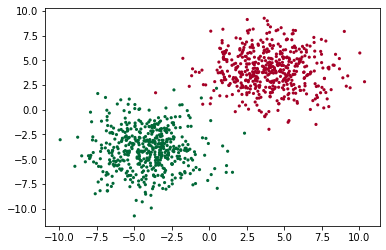

In [35]:
cluster = torch.ones(500, 2)
data0 = torch.normal(4*cluster, 2)  # 以cluster为平均值，2为标准差，生成随机数据
data1 = torch.normal(-4*cluster, 2)
label0 = torch.zeros(500)    # 生成label数据
label1 = torch.ones(500)

x = torch.cat((data0, data1),).type(torch.FloatTensor)  # cat将两个tensor竖着接起来
y = torch.cat((label0, label1),).type(torch.LongTensor)

# 取x的第0第1列作为x、y轴
plt.scatter(x.numpy()[:,0], x.numpy()[:,1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

In [37]:
net = Net().cuda()
inputs = x.cuda()
target = y.cuda()

In [38]:
from torch import optim

opt = optim.SGD(net.parameters(), lr=0.02)
lossF = nn.CrossEntropyLoss()

In [41]:
def train(model, lossF, opt, epochs):
    for epoch in range(epochs):
        outputs = model(inputs)
        loss = lossF(outputs, target)

        opt.zero_grad()
        loss.backward()
        opt.step()
        #
        if epoch % 100 == 0:
            print(f'当前的loss为{loss.item()}')

In [42]:
train(net, lossF, opt, 1000)

当前的loss为0.8996658325195312
当前的loss为0.41836586594581604
当前的loss为0.354026734828949
当前的loss为0.34131231904029846
当前的loss为0.335673063993454
当前的loss为0.3323962092399597
当前的loss为0.33023983240127563
当前的loss为0.32869866490364075
当前的loss为0.3275335729122162
当前的loss为0.32661503553390503
